In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe


fnc='/mnt/h/WRF_2023_DATA/CPSs/wrfout_d01_01.nc'#2023 Idai New Schemes
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"

#fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#
ds = xr.open_dataset(fnc)#.isel(Time=0) #.squeeze()#.isel(Time=0)


ds=ds.rename({'XLONG':'lon','XLAT':'lat'})#, inplace=True)

print(ds)


lat = ds.lat.values[0, :, :]
lon = ds.lon.values[0, :, :]

lat

ds_in = xr.Dataset(
{ 'lon': (['south_north', 'west_east'], lon), ' lat': (['south_north', 'west_east'], lat), } ) 

#print(ds_in)

#ds_out = xe.util.grid_2d(-80.0, 80.0, 0.1, -60.0, 60.0, 0.1)

ds_out = xe.util.grid_global(0.1, 0.1)
ds_out  # conta

resolution = 0.1 # degree
Lat_min = 20; Lat_max = 50
Lon_min = -115; Lon_max = -65


nested_grid = xe.util.grid_2d(Lon_min-resolution/2, Lon_max+resolution/2, resolution,  # longitude boundary range and resolution
                        Lat_min-resolution/2, Lat_max+resolution/2, resolution)  # latitude boundary range and resolution
nested_grid

ds_in



<xarray.Dataset>
Dimensions:                (Time: 41, south_north: 300, west_east: 330,
                            bottom_top: 32, bottom_top_stag: 33,
                            soil_layers_stag: 4, west_east_stag: 331,
                            south_north_stag: 301, ocean_layer_stag: 30)
Coordinates:
    lat                    (Time, south_north, west_east) float32 ...
    lon                    (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_no

/home/matwayi/anaconda3/lib/python3.8/site-packages/xesmf/util.py:149: UserWarning: 360 cannot be divided by d_lon = 0.1, might not cover the globe uniformally
  warnings.warn(
/home/matwayi/anaconda3/lib/python3.8/site-packages/xesmf/util.py:155: UserWarning: 180 cannot be divided by d_lat = 0.1, might not cover the globe uniformally
  warnings.warn(


<xarray.Dataset>
Dimensions:  (south_north: 300, west_east: 330)
Dimensions without coordinates: south_north, west_east
Data variables:
    lon      (south_north, west_east) float32 17.43 17.6 17.76 ... 72.4 72.57
     lat     (south_north, west_east) float32 -37.28 -37.28 ... 9.835 9.835

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

import pandas as pd

fnc='/mnt/h/WRF_2023_DATA/CPSs/wrfout_d01_01.nc'#2023 Idai New Schemes
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"

#fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#
ds_wrf = xr.open_dataset(fnc)#.isel(Time=0) #.squeeze()#.isel(Time=0)


da_time = ds_wrf['Times']
da_time


<xarray.DataArray 'Times' (Time: 41)>
array([b'2019-03-11_00:00:00', b'2019-03-11_03:00:00', b'2019-03-11_06:00:00',
       b'2019-03-11_09:00:00', b'2019-03-11_12:00:00', b'2019-03-11_15:00:00',
       b'2019-03-11_18:00:00', b'2019-03-11_21:00:00', b'2019-03-12_00:00:00',
       b'2019-03-12_03:00:00', b'2019-03-12_06:00:00', b'2019-03-12_09:00:00',
       b'2019-03-12_12:00:00', b'2019-03-12_15:00:00', b'2019-03-12_18:00:00',
       b'2019-03-12_21:00:00', b'2019-03-13_00:00:00', b'2019-03-13_03:00:00',
       b'2019-03-13_06:00:00', b'2019-03-13_09:00:00', b'2019-03-13_12:00:00',
       b'2019-03-13_15:00:00', b'2019-03-13_18:00:00', b'2019-03-13_21:00:00',
       b'2019-03-14_00:00:00', b'2019-03-14_03:00:00', b'2019-03-14_06:00:00',
       b'2019-03-14_09:00:00', b'2019-03-14_12:00:00', b'2019-03-14_15:00:00',
       b'2019-03-14_18:00:00', b'2019-03-14_21:00:00', b'2019-03-15_00:00:00',
       b'2019-03-15_03:00:00', b'2019-03-15_06:00:00', b'2019-03-15_09:00:00',
       b'2019-03-15_12:00:00', b'2019-03-15_15:00:00', b'2019-03-15_18:00:00',
       b'2019-03-15_21:00:00', b'2019-03-16_00:00:00'], dtype='|S19')
Coordinates:
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time

In [37]:
time_strs = [str(i.values)[1:] for i in da_time]
time_strs

["'2019-03-11_00:00:00'",
 "'2019-03-11_03:00:00'",
 "'2019-03-11_06:00:00'",
 "'2019-03-11_09:00:00'",
 "'2019-03-11_12:00:00'",
 "'2019-03-11_15:00:00'",
 "'2019-03-11_18:00:00'",
 "'2019-03-11_21:00:00'",
 "'2019-03-12_00:00:00'",
 "'2019-03-12_03:00:00'",
 "'2019-03-12_06:00:00'",
 "'2019-03-12_09:00:00'",
 "'2019-03-12_12:00:00'",
 "'2019-03-12_15:00:00'",
 "'2019-03-12_18:00:00'",
 "'2019-03-12_21:00:00'",
 "'2019-03-13_00:00:00'",
 "'2019-03-13_03:00:00'",
 "'2019-03-13_06:00:00'",
 "'2019-03-13_09:00:00'",
 "'2019-03-13_12:00:00'",
 "'2019-03-13_15:00:00'",
 "'2019-03-13_18:00:00'",
 "'2019-03-13_21:00:00'",
 "'2019-03-14_00:00:00'",
 "'2019-03-14_03:00:00'",
 "'2019-03-14_06:00:00'",
 "'2019-03-14_09:00:00'",
 "'2019-03-14_12:00:00'",
 "'2019-03-14_15:00:00'",
 "'2019-03-14_18:00:00'",
 "'2019-03-14_21:00:00'",
 "'2019-03-15_00:00:00'",
 "'2019-03-15_03:00:00'",
 "'2019-03-15_06:00:00'",
 "'2019-03-15_09:00:00'",
 "'2019-03-15_12:00:00'",
 "'2019-03-15_15:00:00'",
 "'2019-03-1

In [38]:
time_strs = [str(i.values)[1:].replace("_"," ") for i in da_time]
time_strs

["'2019-03-11 00:00:00'",
 "'2019-03-11 03:00:00'",
 "'2019-03-11 06:00:00'",
 "'2019-03-11 09:00:00'",
 "'2019-03-11 12:00:00'",
 "'2019-03-11 15:00:00'",
 "'2019-03-11 18:00:00'",
 "'2019-03-11 21:00:00'",
 "'2019-03-12 00:00:00'",
 "'2019-03-12 03:00:00'",
 "'2019-03-12 06:00:00'",
 "'2019-03-12 09:00:00'",
 "'2019-03-12 12:00:00'",
 "'2019-03-12 15:00:00'",
 "'2019-03-12 18:00:00'",
 "'2019-03-12 21:00:00'",
 "'2019-03-13 00:00:00'",
 "'2019-03-13 03:00:00'",
 "'2019-03-13 06:00:00'",
 "'2019-03-13 09:00:00'",
 "'2019-03-13 12:00:00'",
 "'2019-03-13 15:00:00'",
 "'2019-03-13 18:00:00'",
 "'2019-03-13 21:00:00'",
 "'2019-03-14 00:00:00'",
 "'2019-03-14 03:00:00'",
 "'2019-03-14 06:00:00'",
 "'2019-03-14 09:00:00'",
 "'2019-03-14 12:00:00'",
 "'2019-03-14 15:00:00'",
 "'2019-03-14 18:00:00'",
 "'2019-03-14 21:00:00'",
 "'2019-03-15 00:00:00'",
 "'2019-03-15 03:00:00'",
 "'2019-03-15 06:00:00'",
 "'2019-03-15 09:00:00'",
 "'2019-03-15 12:00:00'",
 "'2019-03-15 15:00:00'",
 "'2019-03-1

In [39]:
time_datetime = pd.to_datetime(time_strs)
time_datetime

DatetimeIndex(['2019-03-11 00:00:00', '2019-03-11 03:00:00',
               '2019-03-11 06:00:00', '2019-03-11 09:00:00',
               '2019-03-11 12:00:00', '2019-03-11 15:00:00',
               '2019-03-11 18:00:00', '2019-03-11 21:00:00',
               '2019-03-12 00:00:00', '2019-03-12 03:00:00',
               '2019-03-12 06:00:00', '2019-03-12 09:00:00',
               '2019-03-12 12:00:00', '2019-03-12 15:00:00',
               '2019-03-12 18:00:00', '2019-03-12 21:00:00',
               '2019-03-13 00:00:00', '2019-03-13 03:00:00',
               '2019-03-13 06:00:00', '2019-03-13 09:00:00',
               '2019-03-13 12:00:00', '2019-03-13 15:00:00',
               '2019-03-13 18:00:00', '2019-03-13 21:00:00',
               '2019-03-14 00:00:00', '2019-03-14 03:00:00',
               '2019-03-14 06:00:00', '2019-03-14 09:00:00',
               '2019-03-14 12:00:00', '2019-03-14 15:00:00',
               '2019-03-14 18:00:00', '2019-03-14 21:00:00',
               '2019-03-

In [40]:
ds_wrf_timedim = ds_wrf.rename({'Time':'time'})
ds_wrf_timedim

<xarray.Dataset>
Dimensions:                (time: 41, south_north: 300, west_east: 330,
                            bottom_top: 32, bottom_top_stag: 33,
                            soil_layers_stag: 4, west_east_stag: 331,
                            south_north_stag: 301, ocean_layer_stag: 30)
Coordinates:
    XLAT                   (time, south_north, west_east) float32 ...
    XLONG                  (time, south_north, west_east) float32 ...
    XTIME                  (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    XLAT_U                 (time, south_north, west_east_stag) float32 ...
    XLONG_U                (time, south_north, west_east_stag) float32 ...
    XLAT_V                 (time, south_north_stag, west_east) float32 ...
    XLONG_V                (time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                ocean_layer_stag
Data variables: (12/175)
    Times                  (time) |S19 b'2019-03-11_00:00:00' ... b'2019-03-1...
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 ...
    ZNW                    (time, bottom_top_stag) float32 ...
    ZS                     (time, soil_layers_stag) float32 ...
    DZS                    (time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (time, south_north, west_east) float32 ...
    PC                     (time, south_north, west_east) float32 ...
    LANDMASK               (time, south_north, west_east) float32 ...
    LAKEMASK               (time, south_north, west_east) float32 ...
    SST                    (time, south_north, west_east) float32 ...
    SST_INPUT              (time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.0 MODEL
    START_DATE:                      2019-03-11_00:00:00
    SIMULATION_START_DATE:           2019-03-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        331
    SOUTH-NORTH_GRID_DIMENSION:      301
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [41]:
ds_wrf_timecoord = ds_wrf_timedim.assign(time=time_datetime)
ds_wrf_timecoord

<xarray.Dataset>
Dimensions:                (time: 41, south_north: 300, west_east: 330,
                            bottom_top: 32, bottom_top_stag: 33,
                            soil_layers_stag: 4, west_east_stag: 331,
                            south_north_stag: 301, ocean_layer_stag: 30)
Coordinates:
    XLAT                   (time, south_north, west_east) float32 ...
    XLONG                  (time, south_north, west_east) float32 ...
    XTIME                  (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    XLAT_U                 (time, south_north, west_east_stag) float32 ...
    XLONG_U                (time, south_north, west_east_stag) float32 ...
    XLAT_V                 (time, south_north_stag, west_east) float32 ...
    XLONG_V                (time, south_north_stag, west_east) float32 ...
  * time                   (time) datetime64[ns] 2019-03-11 ... 2019-03-16
Dimensions without coordinates: south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                ocean_layer_stag
Data variables: (12/175)
    Times                  (time) |S19 b'2019-03-11_00:00:00' ... b'2019-03-1...
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 0.9969 0.9899 ... 0.005046
    ZNW                    (time, bottom_top_stag) float32 1.0 0.9938 ... 0.0
    ZS                     (time, soil_layers_stag) float32 0.05 0.25 ... 1.5
    DZS                    (time, soil_layers_stag) float32 0.1 0.3 ... 0.6 1.0
    ...                     ...
    PCB                    (time, south_north, west_east) float32 ...
    PC                     (time, south_north, west_east) float32 ...
    LANDMASK               (time, south_north, west_east) float32 ...
    LAKEMASK               (time, south_north, west_east) float32 ...
    SST                    (time, south_north, west_east) float32 ...
    SST_INPUT              (time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.0 MODEL
    START_DATE:                      2019-03-11_00:00:00
    SIMULATION_START_DATE:           2019-03-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        331
    SOUTH-NORTH_GRID_DIMENSION:      301
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [42]:
ds_wrf_dropped_Times = ds_wrf_timecoord.drop('Times')
ds_wrf_dropped_Times

<xarray.Dataset>
Dimensions:                (time: 41, south_north: 300, west_east: 330,
                            bottom_top: 32, bottom_top_stag: 33,
                            soil_layers_stag: 4, west_east_stag: 331,
                            south_north_stag: 301, ocean_layer_stag: 30)
Coordinates:
    XLAT                   (time, south_north, west_east) float32 ...
    XLONG                  (time, south_north, west_east) float32 ...
    XTIME                  (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    XLAT_U                 (time, south_north, west_east_stag) float32 ...
    XLONG_U                (time, south_north, west_east_stag) float32 ...
    XLAT_V                 (time, south_north_stag, west_east) float32 ...
    XLONG_V                (time, south_north_stag, west_east) float32 ...
  * time                   (time) datetime64[ns] 2019-03-11 ... 2019-03-16
Dimensions without coordinates: south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                ocean_layer_stag
Data variables: (12/174)
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 0.9969 0.9899 ... 0.005046
    ZNW                    (time, bottom_top_stag) float32 1.0 0.9938 ... 0.0
    ZS                     (time, soil_layers_stag) float32 0.05 0.25 ... 1.5
    DZS                    (time, soil_layers_stag) float32 0.1 0.3 ... 0.6 1.0
    VAR_SSO                (time, south_north, west_east) float32 ...
    ...                     ...
    PCB                    (time, south_north, west_east) float32 ...
    PC                     (time, south_north, west_east) float32 ...
    LANDMASK               (time, south_north, west_east) float32 ...
    LAKEMASK               (time, south_north, west_east) float32 ...
    SST                    (time, south_north, west_east) float32 ...
    SST_INPUT              (time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.0 MODEL
    START_DATE:                      2019-03-11_00:00:00
    SIMULATION_START_DATE:           2019-03-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        331
    SOUTH-NORTH_GRID_DIMENSION:      301
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [43]:
ds_geo = xr.open_dataset('/mnt/h/WRF_2023_DATA/CPSs/wrfinput_d01')
ds_geo

<xarray.Dataset>
Dimensions:               (Time: 1, south_north: 300, west_east: 330,
                           bottom_top: 32, bottom_top_stag: 33,
                           soil_layers_stag: 4, dust_erosion_dimension: 3,
                           west_east_stag: 331, south_north_stag: 301,
                           DIM0010: 10, land_cat_stag: 21, soil_cat_stag: 16,
                           ocean_layer_stag: 30,
                           num_ext_model_couple_dom_stag: 1)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 ...
    XLONG                 (Time, south_north, west_east) float32 ...
    XLAT_U                (Time, south_north, west_east_stag) float32 ...
    XLONG_U               (Time, south_north, west_east_stag) float32 ...
    XLAT_V                (Time, south_north_stag, west_east) float32 ...
    XLONG_V               (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                dust_erosion_dimension, west_east_stag,
                                south_north_stag, DIM0010, land_cat_stag,
                                soil_cat_stag, ocean_layer_stag,
                                num_ext_model_couple_dom_stag
Data variables: (12/182)
    Times                 (Time) |S19 ...
    LU_INDEX              (Time, south_north, west_east) float32 ...
    ZNU                   (Time, bottom_top) float32 ...
    ZNW                   (Time, bottom_top_stag) float32 ...
    ZS                    (Time, soil_layers_stag) float32 ...
    DZS                   (Time, soil_layers_stag) float32 ...
    ...                    ...
    C4F                   (Time, bottom_top_stag) float32 ...
    PCB                   (Time, south_north, west_east) float32 ...
    PC                    (Time, south_north, west_east) float32 ...
    LANDMASK              (Time, south_north, west_east) float32 ...
    LAKEMASK              (Time, south_north, west_east) float32 ...
    SST                   (Time, south_north, west_east) float32 ...
Attributes: (12/89)
    TITLE:                            OUTPUT FROM REAL_EM V4.0 PREPROCESSOR
    START_DATE:                      2019-03-11_00:00:00
    SIMULATION_START_DATE:           2019-03-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        331
    SOUTH-NORTH_GRID_DIMENSION:      301
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [46]:
ds_geo.coords['XLAT']

<xarray.DataArray 'XLAT' (Time: 1, south_north: 300, west_east: 330)>
array([[[-37.283436, -37.283436, ..., -37.283436, -37.283436],
        [-37.149952, -37.149952, ..., -37.149952, -37.149952],
        ...,
        [  9.670189,   9.670189, ...,   9.670189,   9.670189],
        [  9.835373,   9.835373, ...,   9.835373,   9.835373]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 -37.28 -37.28 ... 9.835
    XLONG    (Time, south_north, west_east) float32 17.43 17.6 ... 72.4 72.57
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:

In [47]:
ds_geo.coords['XLONG']

<xarray.DataArray 'XLONG' (Time: 1, south_north: 300, west_east: 330)>
array([[[17.427395, 17.595009, ..., 72.40499 , 72.5726  ],
        [17.427395, 17.595009, ..., 72.40499 , 72.5726  ],
        ...,
        [17.427395, 17.595009, ..., 72.40499 , 72.5726  ],
        [17.427395, 17.595009, ..., 72.40499 , 72.5726  ]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 -37.28 -37.28 ... 9.835
    XLONG    (Time, south_north, west_east) float32 17.43 17.6 ... 72.4 72.57
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:

In [48]:
ds_wrf_w_latlon = ds_wrf_dropped_Times.assign_coords(lat=ds_geo.coords['XLAT'].squeeze('Time'), lon=ds_geo.coords['XLONG'].squeeze('Time'))
ds_wrf_w_latlon

<xarray.Dataset>
Dimensions:                (south_north: 300, west_east: 330, time: 41,
                            bottom_top: 32, bottom_top_stag: 33,
                            soil_layers_stag: 4, west_east_stag: 331,
                            south_north_stag: 301, ocean_layer_stag: 30)
Coordinates:
    XLAT                   (south_north, west_east) float32 -37.28 ... 9.835
    XLONG                  (south_north, west_east) float32 17.43 17.6 ... 72.57
    XTIME                  (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    XLAT_U                 (time, south_north, west_east_stag) float32 ...
    XLONG_U                (time, south_north, west_east_stag) float32 ...
    XLAT_V                 (time, south_north_stag, west_east) float32 ...
    XLONG_V                (time, south_north_stag, west_east) float32 ...
  * time                   (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    lat                    (south_north, west_east) float32 -37.28 ... 9.835
    lon                    (south_north, west_east) float32 17.43 17.6 ... 72.57
Dimensions without coordinates: south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                ocean_layer_stag
Data variables: (12/174)
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 0.9969 0.9899 ... 0.005046
    ZNW                    (time, bottom_top_stag) float32 1.0 0.9938 ... 0.0
    ZS                     (time, soil_layers_stag) float32 0.05 0.25 ... 1.5
    DZS                    (time, soil_layers_stag) float32 0.1 0.3 ... 0.6 1.0
    VAR_SSO                (time, south_north, west_east) float32 ...
    ...                     ...
    PCB                    (time, south_north, west_east) float32 ...
    PC                     (time, south_north, west_east) float32 ...
    LANDMASK               (time, south_north, west_east) float32 ...
    LAKEMASK               (time, south_north, west_east) float32 ...
    SST                    (time, south_north, west_east) float32 ...
    SST_INPUT              (time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.0 MODEL
    START_DATE:                      2019-03-11_00:00:00
    SIMULATION_START_DATE:           2019-03-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        331
    SOUTH-NORTH_GRID_DIMENSION:      301
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [49]:
da_land = ds_geo.LANDMASK.squeeze('Time')
da_lake = ds_geo.LAKEMASK.squeeze('Time')

ds_wrf_w_masks = ds_wrf_w_latlon.assign_coords(landmask=da_land, lakemask=da_lake)
ds_wrf_w_masks

<xarray.Dataset>
Dimensions:                (south_north: 300, west_east: 330, time: 41,
                            bottom_top: 32, bottom_top_stag: 33,
                            soil_layers_stag: 4, west_east_stag: 331,
                            south_north_stag: 301, ocean_layer_stag: 30)
Coordinates:
    XLAT                   (south_north, west_east) float32 -37.28 ... 9.835
    XLONG                  (south_north, west_east) float32 17.43 17.6 ... 72.57
    XTIME                  (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    XLAT_U                 (time, south_north, west_east_stag) float32 ...
    XLONG_U                (time, south_north, west_east_stag) float32 ...
    XLAT_V                 (time, south_north_stag, west_east) float32 ...
    XLONG_V                (time, south_north_stag, west_east) float32 ...
  * time                   (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    lat                    (south_north, west_east) float32 -37.28 ... 9.835
    lon                    (south_north, west_east) float32 17.43 17.6 ... 72.57
    landmask               (south_north, west_east) float32 0.0 0.0 ... 0.0 0.0
    lakemask               (south_north, west_east) float32 0.0 0.0 ... 0.0 0.0
Dimensions without coordinates: south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                ocean_layer_stag
Data variables: (12/174)
    LU_INDEX               (time, south_north, west_east) float32 ...
    ZNU                    (time, bottom_top) float32 0.9969 0.9899 ... 0.005046
    ZNW                    (time, bottom_top_stag) float32 1.0 0.9938 ... 0.0
    ZS                     (time, soil_layers_stag) float32 0.05 0.25 ... 1.5
    DZS                    (time, soil_layers_stag) float32 0.1 0.3 ... 0.6 1.0
    VAR_SSO                (time, south_north, west_east) float32 ...
    ...                     ...
    PCB                    (time, south_north, west_east) float32 ...
    PC                     (time, south_north, west_east) float32 ...
    LANDMASK               (time, south_north, west_east) float32 ...
    LAKEMASK               (time, south_north, west_east) float32 ...
    SST                    (time, south_north, west_east) float32 ...
    SST_INPUT              (time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.0 MODEL
    START_DATE:                      2019-03-11_00:00:00
    SIMULATION_START_DATE:           2019-03-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        331
    SOUTH-NORTH_GRID_DIMENSION:      301
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [50]:
ds_wrf_rename_latlon = ds_wrf_w_masks.rename({'south_north':'y', 'west_east':'x'})
ds_wrf_rename_latlon

<xarray.Dataset>
Dimensions:                (y: 300, x: 330, time: 41, bottom_top: 32,
                            bottom_top_stag: 33, soil_layers_stag: 4,
                            west_east_stag: 331, south_north_stag: 301,
                            ocean_layer_stag: 30)
Coordinates:
    XLAT                   (y, x) float32 -37.28 -37.28 -37.28 ... 9.835 9.835
    XLONG                  (y, x) float32 17.43 17.6 17.76 ... 72.24 72.4 72.57
    XTIME                  (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    XLAT_U                 (time, y, west_east_stag) float32 ...
    XLONG_U                (time, y, west_east_stag) float32 ...
    XLAT_V                 (time, south_north_stag, x) float32 ...
    XLONG_V                (time, south_north_stag, x) float32 ...
  * time                   (time) datetime64[ns] 2019-03-11 ... 2019-03-16
    lat                    (y, x) float32 -37.28 -37.28 -37.28 ... 9.835 9.835
    lon                    (y, x) float32 17.43 17.6 17.76 ... 72.24 72.4 72.57
    landmask               (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lakemask               (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Dimensions without coordinates: y, x, bottom_top, bottom_top_stag,
                                soil_layers_stag, west_east_stag,
                                south_north_stag, ocean_layer_stag
Data variables: (12/174)
    LU_INDEX               (time, y, x) float32 ...
    ZNU                    (time, bottom_top) float32 0.9969 0.9899 ... 0.005046
    ZNW                    (time, bottom_top_stag) float32 1.0 0.9938 ... 0.0
    ZS                     (time, soil_layers_stag) float32 0.05 0.25 ... 1.5
    DZS                    (time, soil_layers_stag) float32 0.1 0.3 ... 0.6 1.0
    VAR_SSO                (time, y, x) float32 ...
    ...                     ...
    PCB                    (time, y, x) float32 ...
    PC                     (time, y, x) float32 ...
    LANDMASK               (time, y, x) float32 ...
    LAKEMASK               (time, y, x) float32 ...
    SST                    (time, y, x) float32 ...
    SST_INPUT              (time, y, x) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.0 MODEL
    START_DATE:                      2019-03-11_00:00:00
    SIMULATION_START_DATE:           2019-03-11_00:00:00
    WEST-EAST_GRID_DIMENSION:        331
    SOUTH-NORTH_GRID_DIMENSION:      301
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [ ]:
ds_wrf_dropxlatlon = ds_wrf_rename_latlon.drop(['XLAT', 'XLONG'])
ds_wrf_dropxlatlon.to_netcdf('/mnt/h/WRF_2023_DATA/CPSs/cf_wrfout_d01_01.nc')

In [53]:
ds_wrf_cf = ds_wrf_dropxlatlon

prc = ds_wrf_cf['RAINC'].sel(time=slice('2019-03-11', '2019-03-16'))
prc_mean = prc.mean('time')

da_mask = ds_wrf_cf['landmask'].where(ds_wrf_cf['lakemask'].values == 0, other=1)

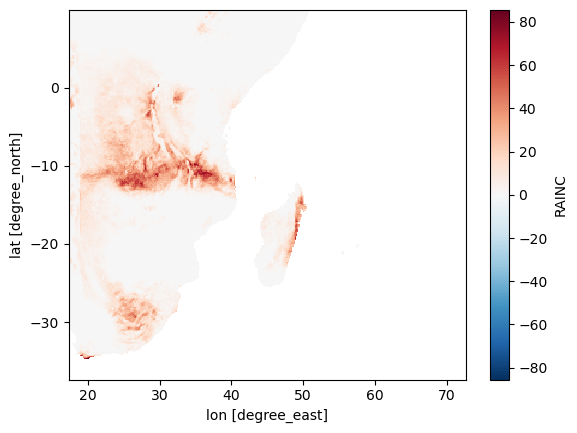

In [54]:
fig = plt.figure()#figsize=(10, 8))

prc_mean.where(da_mask.values == 1).plot(x='lon', y='lat')

plt 